## Predict Heart Disease using Machine Learning

* **Problem Definition : given clinical parametrs , predict heart disease**
* **Data : UCI Heart Disease Dataset with 14 parameters**
* **Evaluation : 95 % Accuracy**
* **Features :**
    1. age - age in years     2. sex - (1 = male; 0 = female
    3. cp - chest pain type
       * 0 = Typical angina: chest pain related decrease blood supply to the heart
       * 1 = Atypical angina: chest pain not related to hear
       * 2 = Non-anginal pain: typically esophageal spasms (non heart related)
       * 3 = Asymptomatic: chest pain not showing signs of disease 
    4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern 
    5. chol - serum cholestoral in mg/dl
        * serum = LDL + HDL + .2 * triglycerides
        * above 200 is cause for concern
    6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        * '>126' mg/dL signals diabetes
    7. restecg - resting electrocardiographic results
        * 0: Nothing to note
        * 1: ST-T Wave abnormality
          * can range from mild symptoms to severe problems
          * signals non-normal heart beat
        * 2: Possible or definite left ventricular hypertrophy
          *Enlarged heart's main pumping chamber
    8. thalach - maximum heart rate achieved
    9. exang - exercise induced angina (1 = yes; 0 = no)
    10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
    11. slope - the slope of the peak exercise ST segment
        * 0: Upsloping: better heart rate with excercise (uncommon)
        * 1: Flatsloping: minimal change (typical healthy heart)
        * 2: Downslopins: signs of unhealthy heart
    12. ca - number of major vessels (0-3) colored by flourosopy
        * colored vessel means the doctor can see the blood passing through
        * the more blood movement the better (no clots)
    13. thal - thalium stress result
        * 1,3: normal
        * 6: fixed defect: used to be defect but ok now
        * 7: reversable defect: no proper blood movement when excercising
    14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [48]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report # classification
from sklearn.metrics import precision_score, recall_score,f1_score # classsification
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

## Data Exploration

Find out about the data and become a subject matter expert on the dataset youre working on.

1. What questions are you trying to solve ?
2. What kind of data do we have and how do we treat different data types?
3. Missing data and how do we handle it
4. Outliers and their handling
5. Add , change and remove features from data

In [5]:
df = pd.read_csv("heart-disease.csv")
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

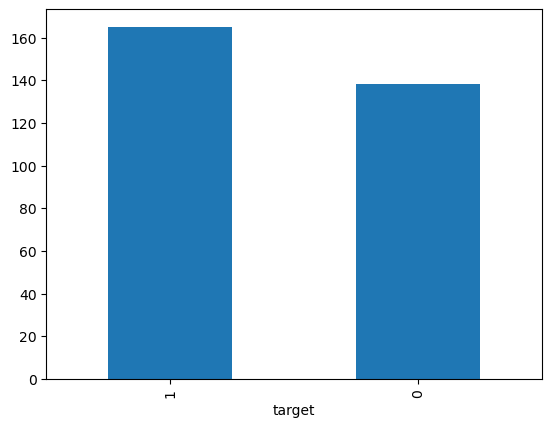

In [8]:
# balanced classes
df.target.value_counts().plot(kind="bar")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# check missing data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
# Heart Frequency according to Sex ( 0 = female , 1 = male )
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [13]:
t = pd.crosstab(df.target, df.sex)

Looking at existing data , we see upwards of 70 percent women having heart diease , and around 50 percent upwards of men having 
heart disease.

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

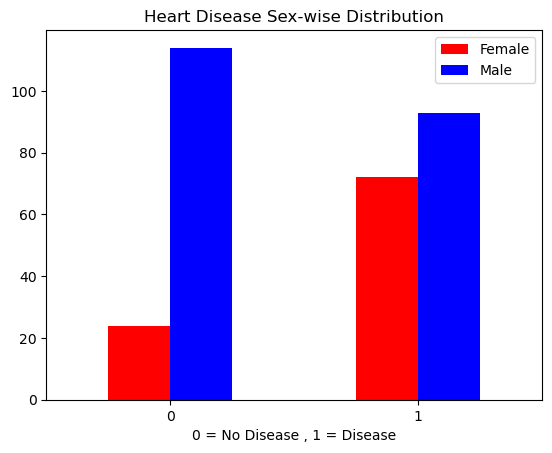

In [14]:
t.plot(kind="bar",color= ["red","blue"])
plt.xlabel("0 = No Disease , 1 = Disease")
plt.legend(["Female","Male"])
plt.title("Heart Disease Sex-wise Distribution")
plt.xticks(rotation=0)

### Compare Age as well as Max Heart Rate (thalach) to target

Text(0, 0.5, 'Max Heart Rate')

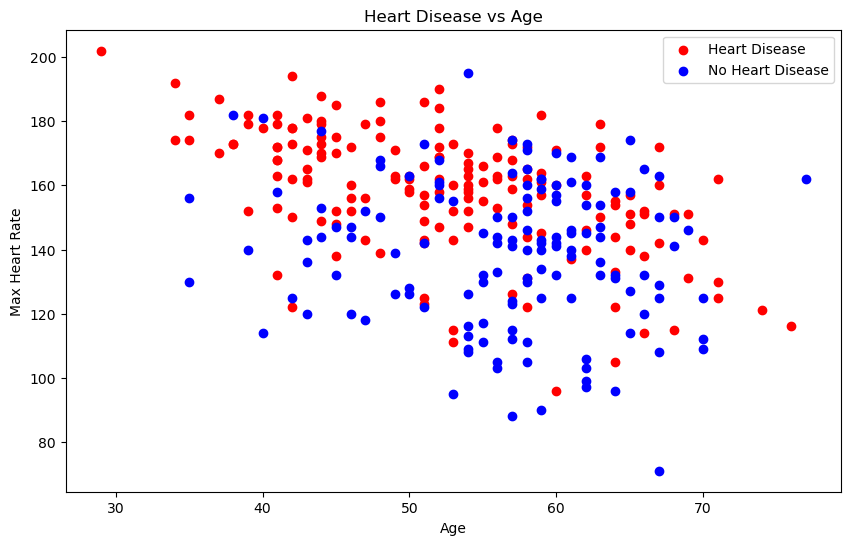

In [15]:
# age
plt.figure(figsize = (10,6))
# positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="red")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="blue")
plt.title("Heart Disease vs Age")
plt.legend(["Heart Disease","No Heart Disease"])
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")

<Axes: ylabel='Frequency'>

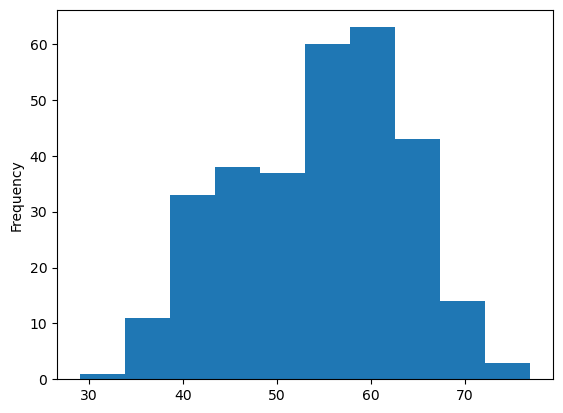

In [16]:
# check the distribution of age
df.age.plot(kind="hist")

### Heart Disease vs Chest Pain
0 = Typical angina: chest pain related decrease blood supply to the heart <br>
1 = Atypical angina: chest pain not related to heart <br>
2 = Non-anginal pain: typically esophageal spasms (non heart related) <br>
3 = Asymptomatic: chest pain not showing signs of disease

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

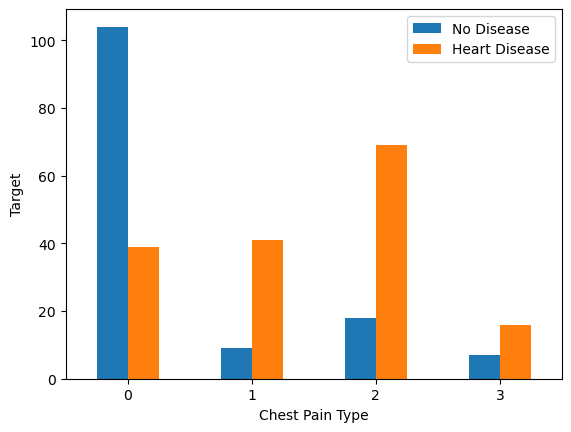

In [17]:
print(pd.crosstab(df.cp , df.target))
pd.crosstab(df.cp , df.target).plot(kind="bar")
plt.xlabel("Chest Pain Type")
plt.ylabel("Target")
plt.legend(["No Disease" , "Heart Disease"])
plt.xticks(rotation=0)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

<Axes: >

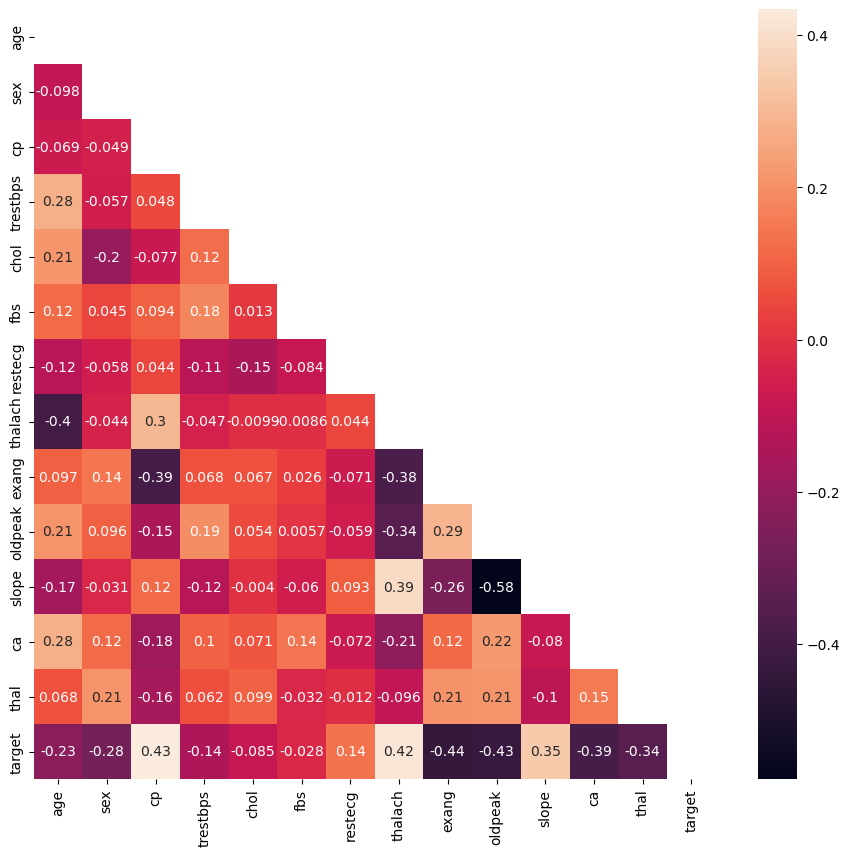

In [18]:
# Correlation Matrix
print(df.corr()) # hard to understand
# use a heatmap
corr_matrix = df.corr()
plt.figure(figsize = (11,10))
sns.heatmap(corr_matrix, annot=True, mask = np.triu(corr_matrix))

## Modelling 

In [19]:
x = df.drop("target",axis=1)
y = df.target

tx,vx,ty,vy = train_test_split(x,y)

Now try different ML Models :
1. Logistic Regression (Logistic Regression is a linear model for classification rather than regression)
2. KNN Classifier
3. Random Forest Classifier

In [20]:
models = {"Logistic Regression" : LogisticRegression(max_iter= 1000),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

# function to fit and score models
def fit_score(models , tx, vx , ty , vy):
    model_scores = {}
    for name,model in models.items():
        model.fit(tx,ty)
        model_scores[name] = model.score(vx,vy)
    return model_scores

                     accuracy
Logistic Regression  0.828947
KNN                  0.644737
Random Forest        0.855263


(array([0, 1, 2]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest')])

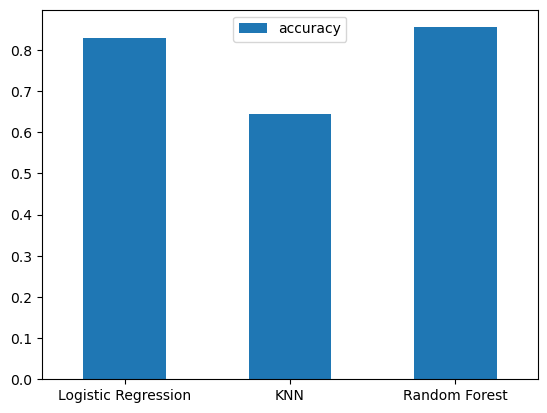

In [21]:
model_score = fit_score(models , tx , vx, ty , vy)
model_compare = pd.DataFrame(model_score, index=["accuracy"]).T
print(model_compare)
model_compare.plot(kind="bar")
plt.xticks(rotation=0)

Classification Metrics : 
1. Accuracy ( model.score() )
2. Precision
3. F1
4. Recall

Others : 

1. Confusion Matrix
2. ROC Curve
3. AUC
4. Classification Report

### Order of Workflow : 
1. Hyperparameter Tuning
2. Feature Engineering
3. Confusion Matrix , Cross - Validation
4. Precision , Recall , F1
5. Classification Report
6. ROC Curve , AUC

## 1. HyperParameter Tuning

Maximum KNN score on the test data: 71.05%


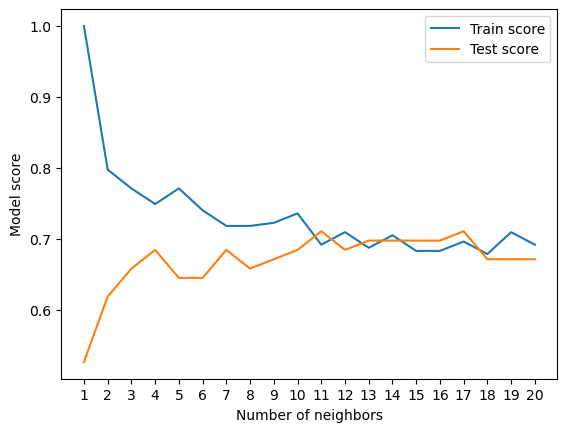

In [22]:
# 1. KNN Model

train_scores = []
test_scores = []
neighbours = range(1,21)

knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors = i)
    knn.fit(tx,ty)
    train_scores.append(knn.score(tx,ty))
    test_scores.append(knn.score(vx,vy))


plt.plot(neighbours, train_scores, label="Train score")
plt.plot(neighbours, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Performance even after hyperparameter tuning not comparable to other 2 models , hence we discard the KNN Model

## Hyperparameter Tuning using Random.SearchCV

Tune Logistic Model , Random Forest Model

In [33]:
# Parameters of Logistic Regression
log_reg_grid = {"C":np.logspace(-4,4,20),"solver":["liblinear"]}

#Parameters of Random Forest Classifier 
rf_grid = {"n_estimators": np.arange(100,1000,10),"max_depth":[None,3,5,10],"min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

In [34]:
# tune logistic model

rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions= log_reg_grid,cv=5,n_iter=20,verbose=True,n_jobs=-1)

#fit 

rs_log_reg.fit(tx,ty)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [36]:
rs_log_reg.score(vx,vy)

0.8552631578947368

In [37]:
# tune random forest

rs_rf = RandomizedSearchCV(RandomForestClassifier(),rf_grid,cv=5,n_iter=20,verbose=True,n_jobs=-1)
rs_rf.fit(tx,ty)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220,
       230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350,
       360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480,
       490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610,
       620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740,
       750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870,
       880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [38]:
rs_rf.best_params_

{'n_estimators': 110,
 'min_samples_split': 8,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [39]:
rs_rf.score(vx,vy)

0.8289473684210527

In [40]:
model_score

{'Logistic Regression': 0.8289473684210527,
 'KNN': 0.6447368421052632,
 'Random Forest': 0.8552631578947368}

In [41]:
# Try GridSearchCV on Logistic Regression

gs_log_reg = GridSearchCV(LogisticRegression(),log_reg_grid,cv=5,verbose=True,n_jobs=-1)
gs_log_reg.fit(tx,ty)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [42]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [43]:
gs_log_reg.score(vx,vy)

0.8552631578947368

## Evaluate the Logistic Model

    Accuracy
    Precision
    Recall
    F1 Score
    Confusion Matrix
    Classification Report
    ROC Curve AUC Score

In [50]:
pred = gs_log_reg.predict(vx)

In [57]:
print(confusion_matrix(vy,pred))

[[25  8]
 [ 3 40]]


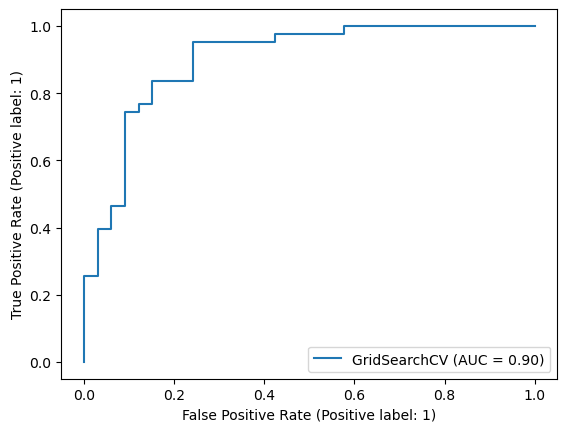

In [61]:
# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(gs_log_reg, 
                               X=vx, 
                               y=vy); 

Text(50.722222222222214, 0.5, 'True Labels')

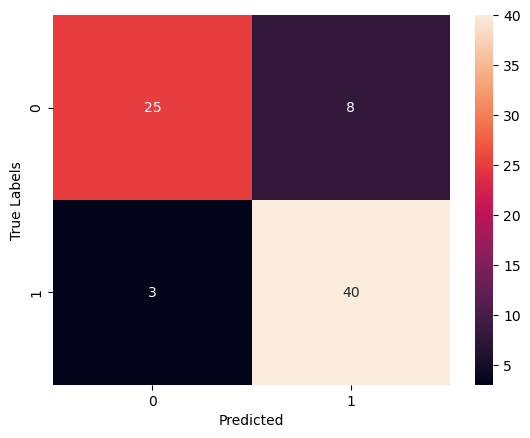

In [60]:
sns.heatmap(confusion_matrix(vy,pred),annot=True)
plt.xlabel("Predicted")
plt.ylabel("True Labels")

In [63]:
print(classification_report(vy,pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.83      0.93      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.84      0.85        76
weighted avg       0.86      0.86      0.85        76



## Above metrics were calculated on a single split , calculate metrics on 
    use cross_val_score

In [81]:
clf = LogisticRegression(solver = 'liblinear', C= 0.23357214690901212)

cv_acc = np.mean(cross_val_score(clf,x,y,cv=5,scoring='accuracy'))
print("CV Accuracy : ",cv_acc)

cv_pre = np.mean(cross_val_score(clf,x,y,cv=5,scoring='precision'))
print("CV Precision : ",cv_pre)

cv_rec = np.mean(cross_val_score(clf,x,y,cv=5,scoring='recall'))
print("CV Recall : ",cv_rec)

cv_f1 = np.mean(cross_val_score(clf,x,y,cv=5,scoring='f1'))
print("CV F1 Score : ",cv_f1)

CV Accuracy :  0.8479781420765027
CV Precision :  0.8215873015873015
CV Recall :  0.9272727272727274
CV F1 Score :  0.8705403543192143


<Axes: >

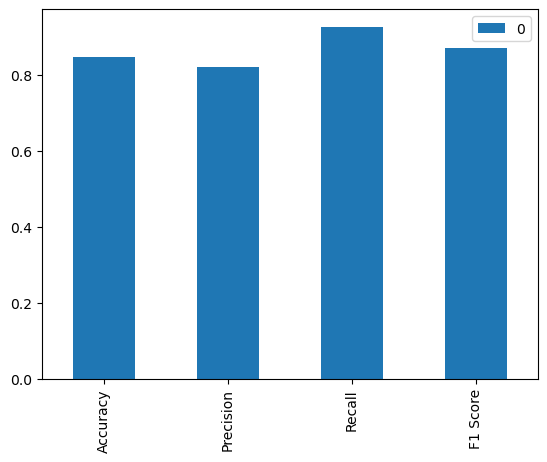

In [84]:
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,"Precision":cv_pre,"Recall":cv_rec,"F1 Score":cv_f1},index=[0])
cv_metrics.T.plot.bar()

## Important Features

In [86]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [88]:
clf = LogisticRegression(solver = 'liblinear', C= 0.23357214690901212)
clf.fit(tx,ty)
clf.coef_
# .coef_ prints how the different features are related with the target variable 

array([[ 0.007459  , -1.0553375 ,  0.68560763, -0.00839322, -0.00343104,
        -0.23981245,  0.14229891,  0.02627131, -0.55983085, -0.51114211,
         0.18784867, -0.67574503, -0.58496871]])

In [98]:
# Map the coefs with the column names for understanding

features = dict(zip(df.columns,clf.coef_[0]))
features

{'age': 0.007458999001177087,
 'sex': -1.055337503286418,
 'cp': 0.6856076336303626,
 'trestbps': -0.008393222233648875,
 'chol': -0.003431038917514847,
 'fbs': -0.23981244756471373,
 'restecg': 0.1422989057814141,
 'thalach': 0.026271311114967534,
 'exang': -0.5598308523289105,
 'oldpeak': -0.5111421068902107,
 'slope': 0.18784867460345703,
 'ca': -0.6757450271630716,
 'thal': -0.5849687133122566}

Text(0, 0.5, 'Importance(Absolute)')

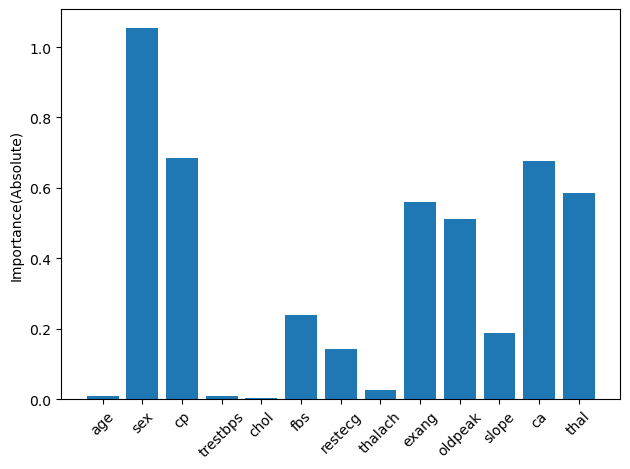

In [115]:
plt.bar(features.keys(),[abs(val) for val in features.values()])
plt.xticks(rotation=45)
plt.ylabel("Importance(Absolute)")